In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from math import sqrt
import seaborn as sns; sns.set()
import ast


In [2]:
# ========== GOOGLE SENTIMENT vs DICTIONARY  =================
#
# EXPERIMENT WITH TIMESTEP 1H
#

newsGoogle =  pd.read_csv('/home/simone/Desktop/NLFF/GoogleNL/Aggregated_1h_dataset/AAPL_googleSentPerTimestep.csv')
newsDict =  pd.read_csv('/home/simone/Desktop/NLFF/intrinioDatasetUpdated/SentimentFullAggregatedHourly/AAPL.csv')

price = pd.read_csv('/home/simone/Desktop/NLFF/indexes/indexesAAPL.csv')

price = price.rename(index=str, columns={"date": "DATE"})

newsGoogle = newsGoogle.rename(index=str, columns={"initTime": "DATE"})
newsDict = newsDict.rename(index=str, columns={"initTime": "DATE"})


newsGoogle['DATE'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in newsGoogle['DATE']]
newsDict['DATE'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in newsDict['DATE']]


# This datased is already GMT+0
price['DATE'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['DATE']]
newsGoogle['entSentVec'] = [ast.literal_eval(row) for row in newsGoogle['entSentVec']]

#ALLIGNMENT GOOGLE SENTIMENT
initDate = newsGoogle['DATE'][0]
finalDate = newsGoogle['DATE'][len(newsGoogle)-1]
price.drop(price[price.DATE > finalDate].index, inplace=True)
price.drop(price[price.DATE < initDate].index, inplace=True)
price = price.reset_index(drop=True)

for data in newsGoogle['DATE']:
    if data not in price['DATE'].tolist():
        print(data)

assert len(price) == len(newsGoogle)

#ALLIGNMENT DICT SENTIMENT
newsDict.drop(newsDict[newsDict.DATE > finalDate].index, inplace=True)
newsDict.drop(newsDict[newsDict.DATE < initDate].index, inplace=True)
newsDict = newsDict.reset_index(drop=True)

for data in newsDict['DATE']:
    if data not in price['DATE'].tolist():
        print(data)

assert len(price) == len(newsDict)


# FEATURES GOOGLE
sentiment = np.asarray(newsGoogle['entSentVec'].tolist())
sentiment = pd.DataFrame(data=sentiment)
X_google = pd.concat([sentiment, sentiment.rolling(5).mean()],axis=1)
X_google = pd.concat([X_google, sentiment.rolling(10).mean()],axis=1)
X_google = pd.concat([X_google, sentiment.rolling(15).mean()],axis=1)
X_google = pd.concat([X_google, sentiment.rolling(20).mean()],axis=1)

# FEATURES DICT
sentiment = newsDict.drop(['Unnamed: 0', 'DATE'], axis=1)
X_dict = pd.concat([sentiment, sentiment.rolling(5).mean()],axis=1)
X_dict = pd.concat([X_dict, sentiment.rolling(10).mean()],axis=1)
X_dict = pd.concat([X_dict, sentiment.rolling(15).mean()],axis=1)
X_dict = pd.concat([X_dict, sentiment.rolling(20).mean()],axis=1)

X_dict.head()


TREND_WINDOWs = [1, 4, 7, 14, 21, 28, 49] #trend at 1h 4h 1d 2d 3d 4d 7d


In [ ]:
# ========== GOOGLE SENTIMENT vs DICTIONARY 15min (ALTERNATIVO AL PRECEDENTE) =================
#
# EXPERIMENT WITH TIMESTEP 15MIN googleSentPerTimestep15min.csv
#

newsGoogle =  pd.read_csv('/home/simone/Desktop/NLFF/GoogleNL/Aggregated_15min_dataset/AAPL_googleSentPerTimestep15min.csv')
newsDict =  pd.read_csv('/home/simone/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/AAPL.csv')

price = pd.read_csv('/home/simone/Desktop/NLFF/TechnicalDatasetUpdated/AAPL.csv')

price = price.rename(index=str, columns={"Unnamed: 0": "DATE"})

newsGoogle = newsGoogle.rename(index=str, columns={"initTime": "DATE"})
newsDict = newsDict.rename(index=str, columns={"initTime": "DATE"})


newsGoogle['DATE'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in newsGoogle['DATE']]
newsDict['DATE'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in newsDict['DATE']]


# This datased is already GMT+0

price['DATE'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') -timedelta(hours=8) for row in price['DATE']]
newsGoogle['entSentVec'] = [ast.literal_eval(row) for row in newsGoogle['entSentVec']]

#ALLIGNMENT GOOGLE SENTIMENT
initDate = newsGoogle['DATE'][0]
finalDate = newsGoogle['DATE'][len(newsGoogle)-1]
price.drop(price[price.DATE > finalDate].index, inplace=True)
price.drop(price[price.DATE < initDate].index, inplace=True)
price = price.reset_index(drop=True)

for data in newsGoogle['DATE']:
    if data not in price['DATE'].tolist():
        print(data)

assert len(price) == len(newsGoogle)

#ALLIGNMENT DICT SENTIMENT
newsDict.drop(newsDict[newsDict.DATE > finalDate].index, inplace=True)
newsDict.drop(newsDict[newsDict.DATE < initDate].index, inplace=True)
newsDict = newsDict.reset_index(drop=True)

for data in newsDict['DATE']:
    if data not in price['DATE'].tolist():
        print(data)

assert len(price) == len(newsDict)


# FEATURES GOOGLE
sentiment = np.asarray(newsGoogle['entSentVec'].tolist())
sentiment = pd.DataFrame(data=sentiment)
X_google = pd.concat([sentiment, sentiment.rolling(5).mean()],axis=1)
X_google = pd.concat([X_google, sentiment.rolling(10).mean()],axis=1)
X_google = pd.concat([X_google, sentiment.rolling(15).mean()],axis=1)
X_google = pd.concat([X_google, sentiment.rolling(20).mean()],axis=1)

# FEATURES DICT
sentiment = newsDict.drop(['Unnamed: 0', 'DATE'], axis=1)
X_dict = pd.concat([sentiment, sentiment.rolling(5).mean()],axis=1)
X_dict = pd.concat([X_dict, sentiment.rolling(10).mean()],axis=1)
X_dict = pd.concat([X_dict, sentiment.rolling(15).mean()],axis=1)
X_dict = pd.concat([X_dict, sentiment.rolling(20).mean()],axis=1)

X_dict.head()

TREND_WINDOWs = [4, 16, 26, 52, 78, 104, 182] #trend at 1h 4h 1d 2d 3d 4d 7d


1 ....................

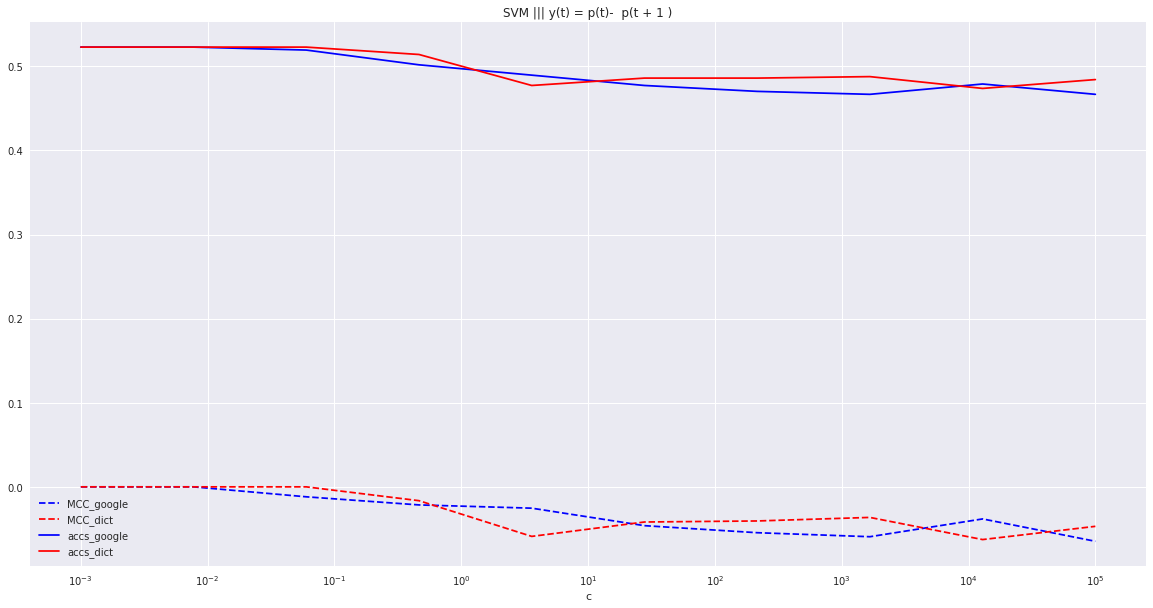


4 ....................

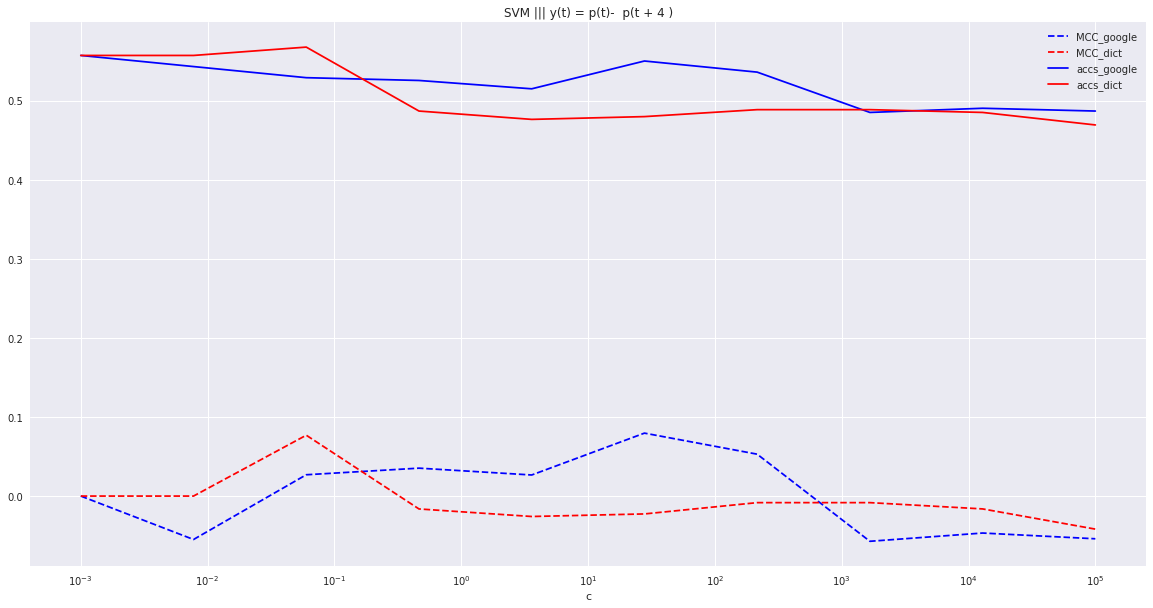


7 ....................

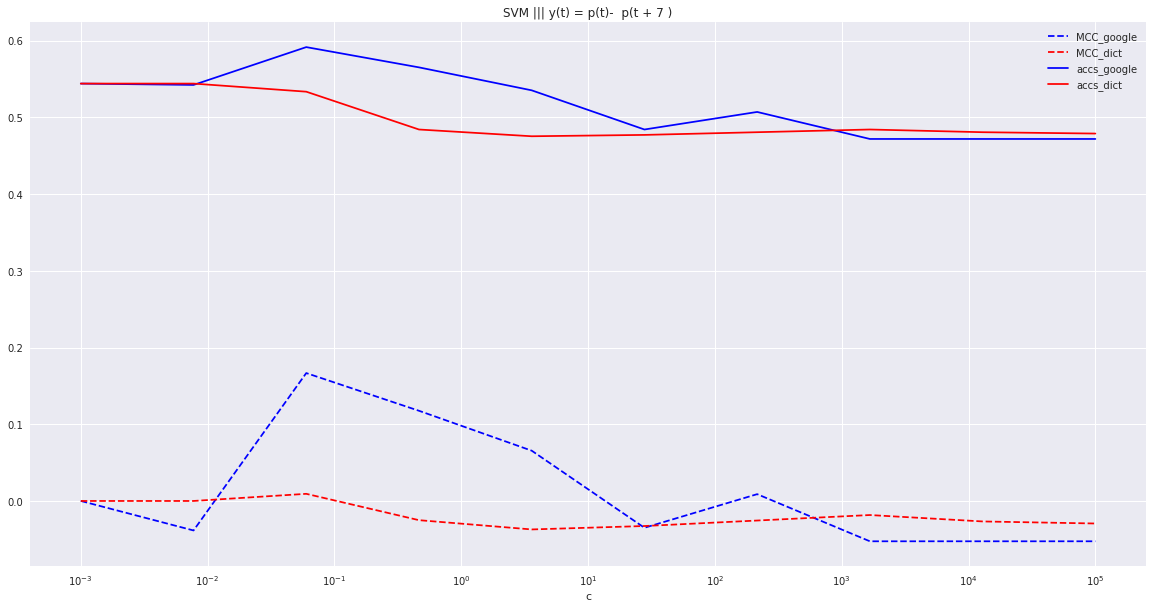


14 ....................

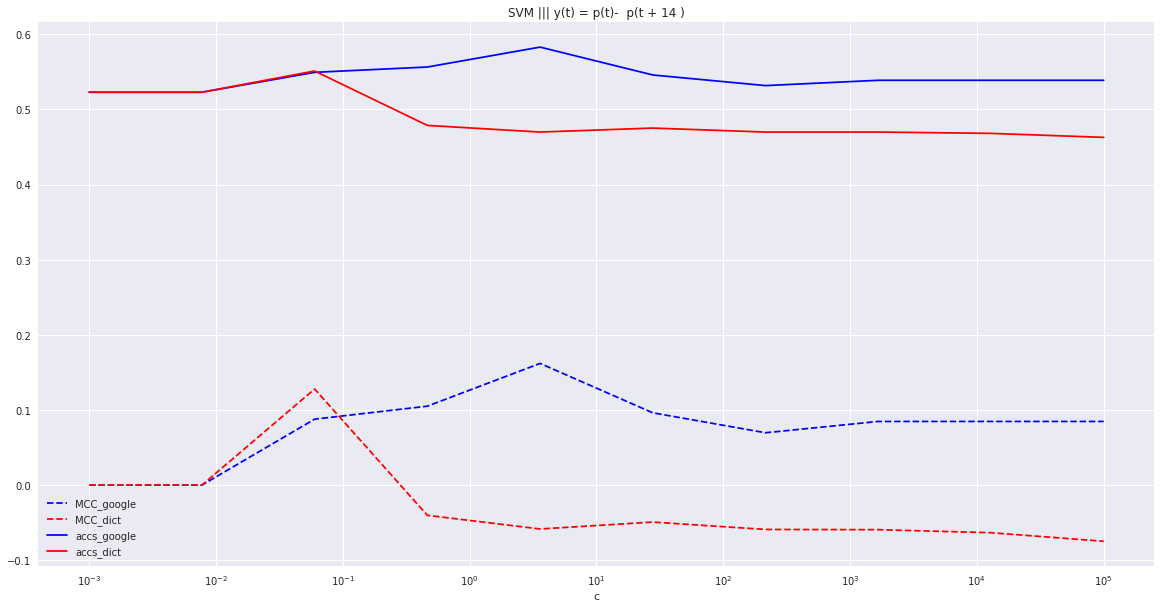


21 ....................

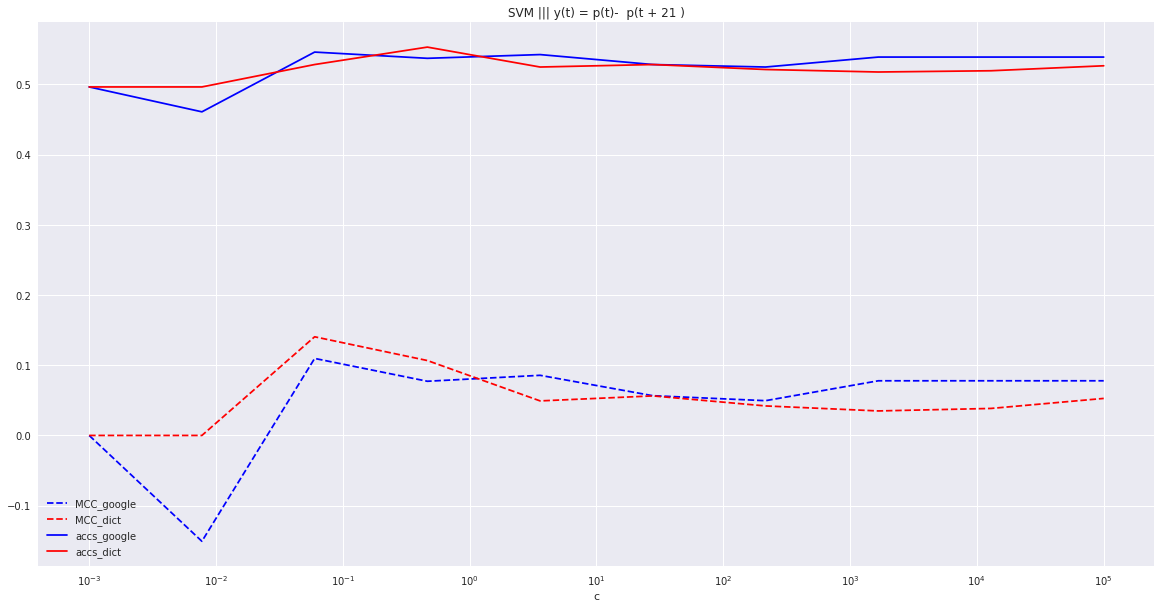


28 ....................

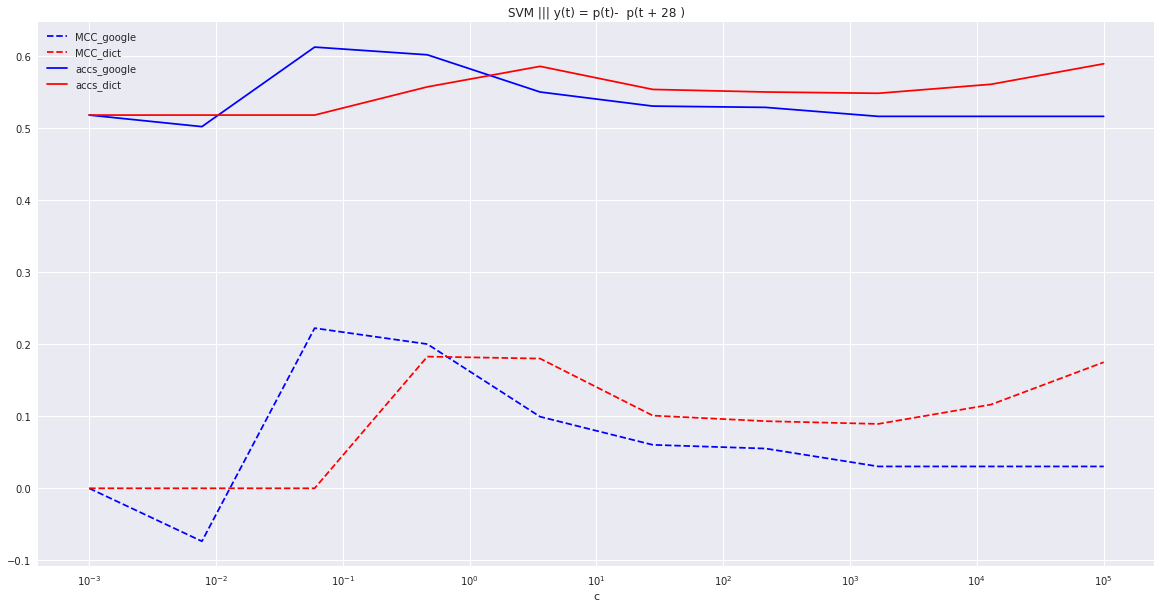


49 ....................

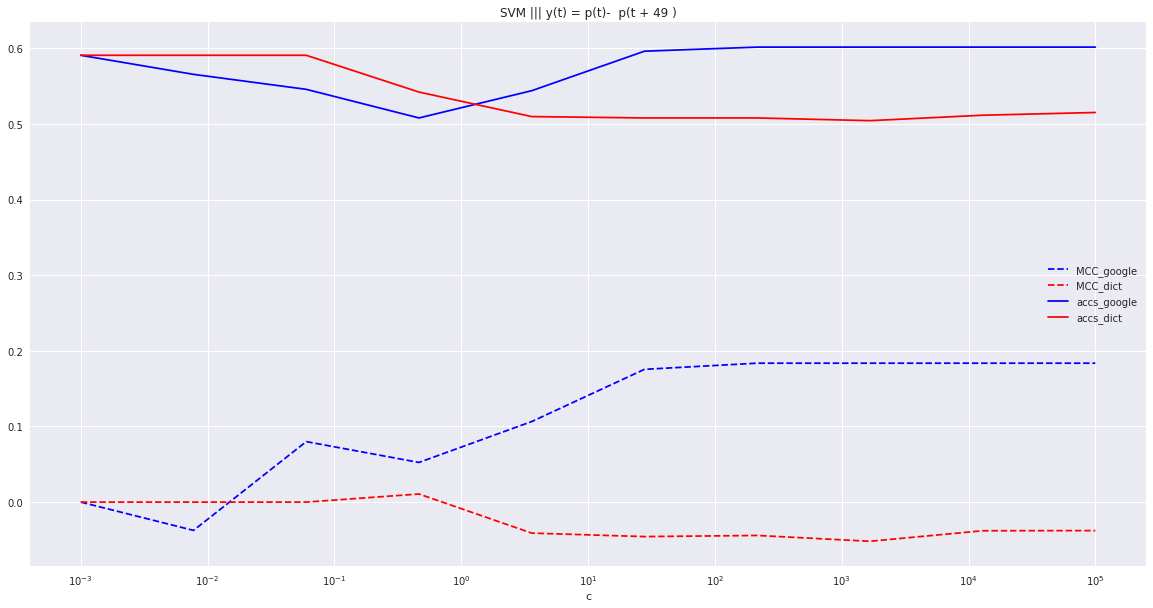

In [3]:
# ========== simple SVM (training set is balanced for every trend window)  =================

#NORMALIZATION:
min_max_scaler = preprocessing.MinMaxScaler()
X_google = np.nan_to_num(np.asarray(X_google, dtype=float))
X_google = np.asarray(min_max_scaler.fit_transform(X_google))

X_dict = np.nan_to_num(np.asarray(X_dict, dtype=float))
X_dict = np.asarray(min_max_scaler.fit_transform(X_dict))

for TREND_WINDOW in TREND_WINDOWs:
    print('\n'+str(TREND_WINDOW)+' ', end='')

    x_google = list()
    x_dict = list()

    #CONSTRUCT LABELS
    y = list()
    up = 0
    down = 0
    for i in range(0,len(price)-TREND_WINDOW):
        s=np.sign(price.iloc[i+TREND_WINDOW]['close']-price.iloc[i]['close'])
        if(s==-1):
            y.append(0)
            down +=1
        else:
            y.append(1)
            up +=1
        x_google.append(X_google[i])
        x_dict.append(X_dict[i])

    #PAST
#     for i in range(TREND_WINDOW,len(price)):
        
#         s=np.sign(price.iloc[i]['close']-price.iloc[i-TREND_WINDOW]['close'])
#         if(s==-1):
#             y.append(0)
#             down +=1
#         else:
#             y.append(1)
#             up +=1
#         x_google.append(X_google[i])
#         x_dict.append(X_dict[i])


    y = np.array(y)
    x_google = np.array(x_google)
    x_dict = np.array(x_dict)


    accs_google = []
    accs_dict = []
    MCC_google = []
    MCC_dict = []
    for c in np.logspace(-3,5,10):
        for (x,y,MCCs,accs) in [(x_google,y,MCC_google,accs_google),(x_dict, y,MCC_dict,accs_dict)]:
            print('.', end='')
            
            #DATASET DIVISION:
            train=0.7
            nt=math.ceil(len(x)*train)
            x_tv = x[:nt]
            y_tv = y[:nt]
            x_test = x[nt:]
            y_test = y[nt:]

            #print('UP: '+str(up)+'\t DOWN: '+str(down))
            #print('UP TRAIN-VAL: '+str(sum(y_tv)/len(y_tv)*100)+'%')
            #print('UP TEST: '+str(sum(y_test)/len(y_test)*100)+'%')

            svm_model = svm.SVC(kernel='linear', C=c)
            svm_model.fit(x_tv,y_tv)
            y_pred = svm_model.predict(x_test)
            acc = svm_model.score(x_test,y_test)
            confmatrix = confusion_matrix(y_test, y_pred)
            tn, fp, fn, tp = confmatrix.ravel()
            denom = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)
            accs.append(acc)
            MCCs.append(0 if denom== 0 else (tp*tn -fp*fn)/sqrt(denom) )
    #       print('MCC,score',MCC)
    #       print('Acc-score:',acc)
    #       print('Window:',TREND_WINDOW)
    #       print(confmatrix)
    #       plt.plot(y_pred)
    #       plt.plot(y_test)
    #       plt.show()

    plt.figure(figsize=(20,10))
    plt.semilogx(np.logspace(-3,5,10), MCC_google,'--b', label='MCC_google')
    plt.semilogx(np.logspace(-3,5,10), MCC_dict,'--r', label='MCC_dict')
    plt.semilogx(np.logspace(-3,5,10),accs_google,'b', label='accs_google')
    plt.semilogx(np.logspace(-3,5,10),accs_dict,'r', label='accs_dict' )

    plt.xlabel('c')
    plt.title('SVM ||| y(t) = p(t)-  p(t + '+str(TREND_WINDOW)+' )')

    plt.legend()
    plt.savefig('future/hourly-comparison/SVM/Trend_'+str(TREND_WINDOW)+'.jpg')
    plt.show()

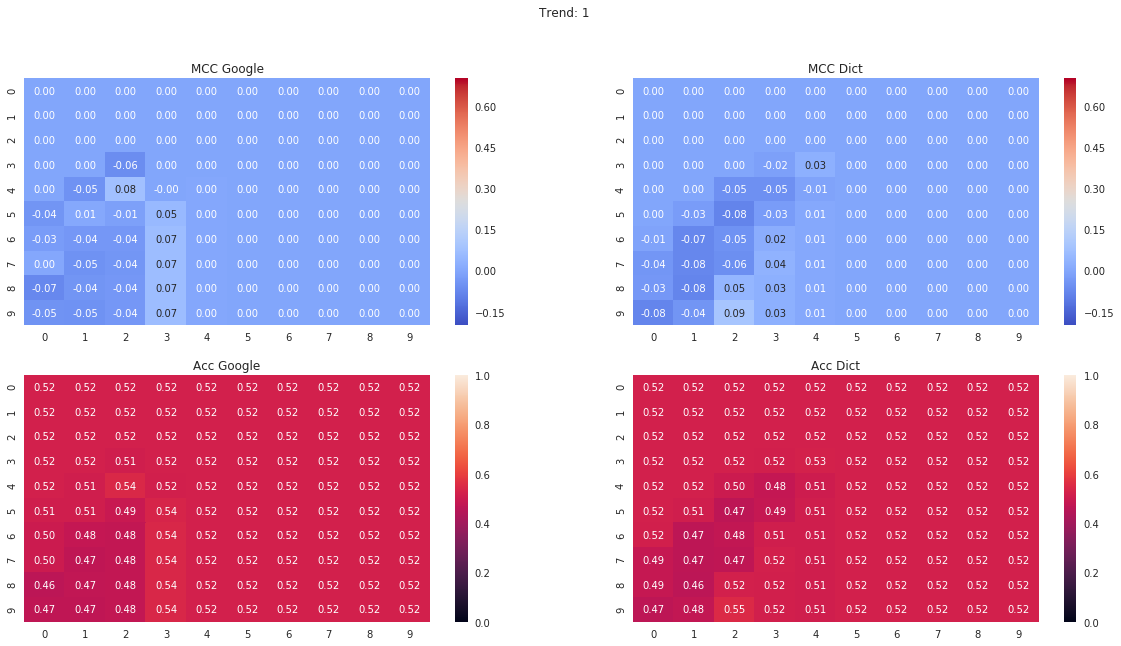

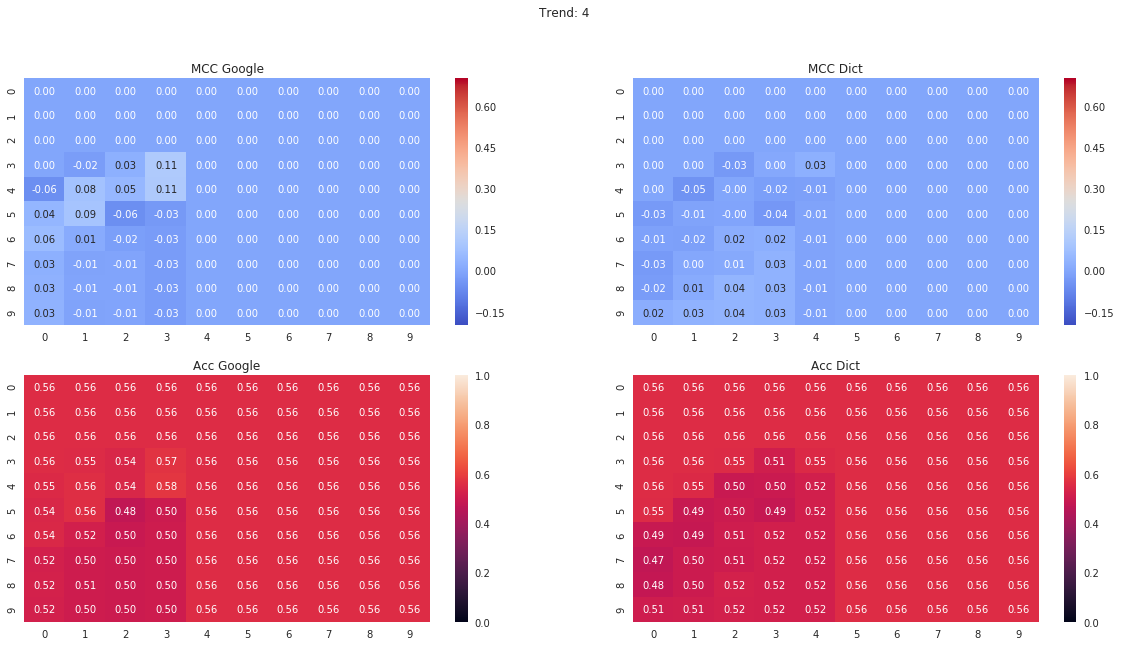

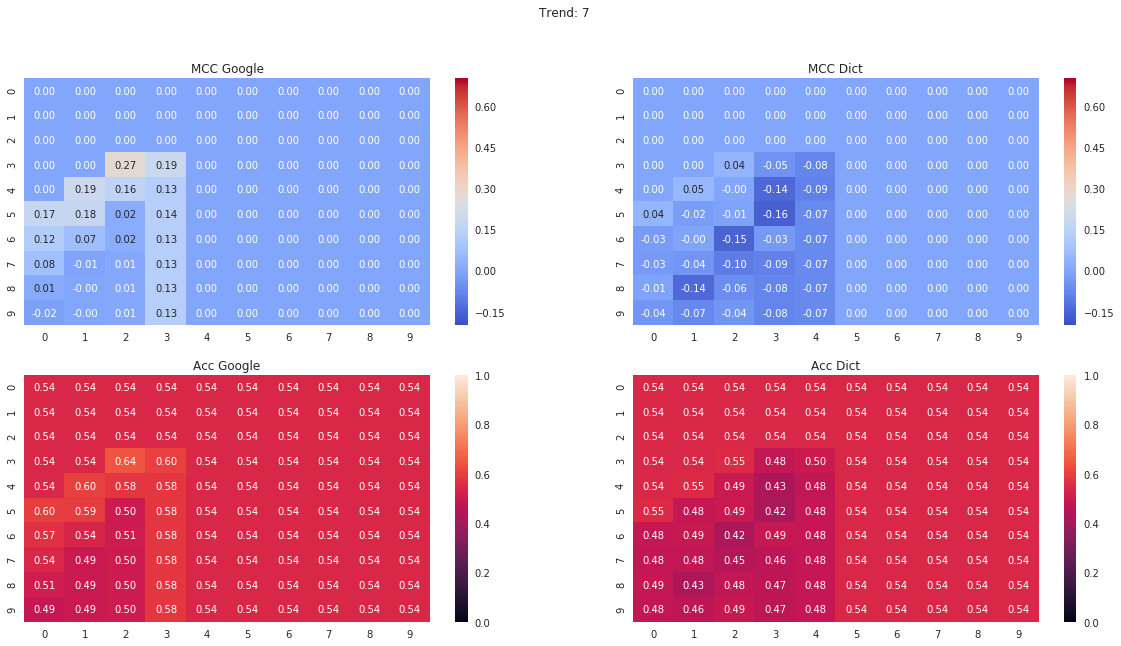

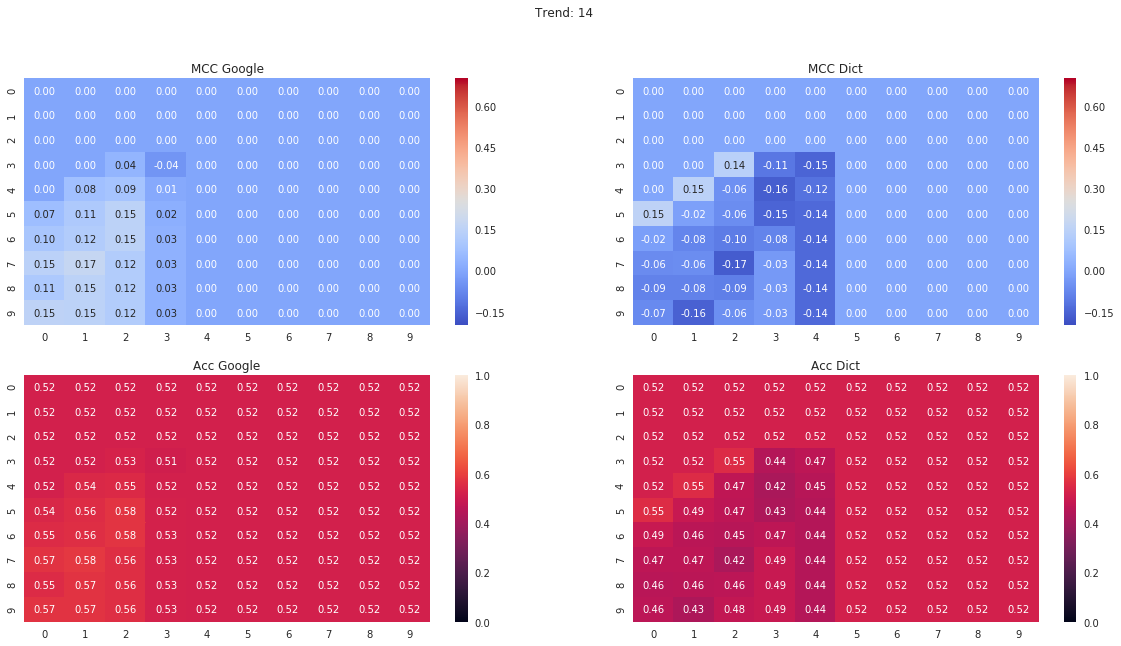

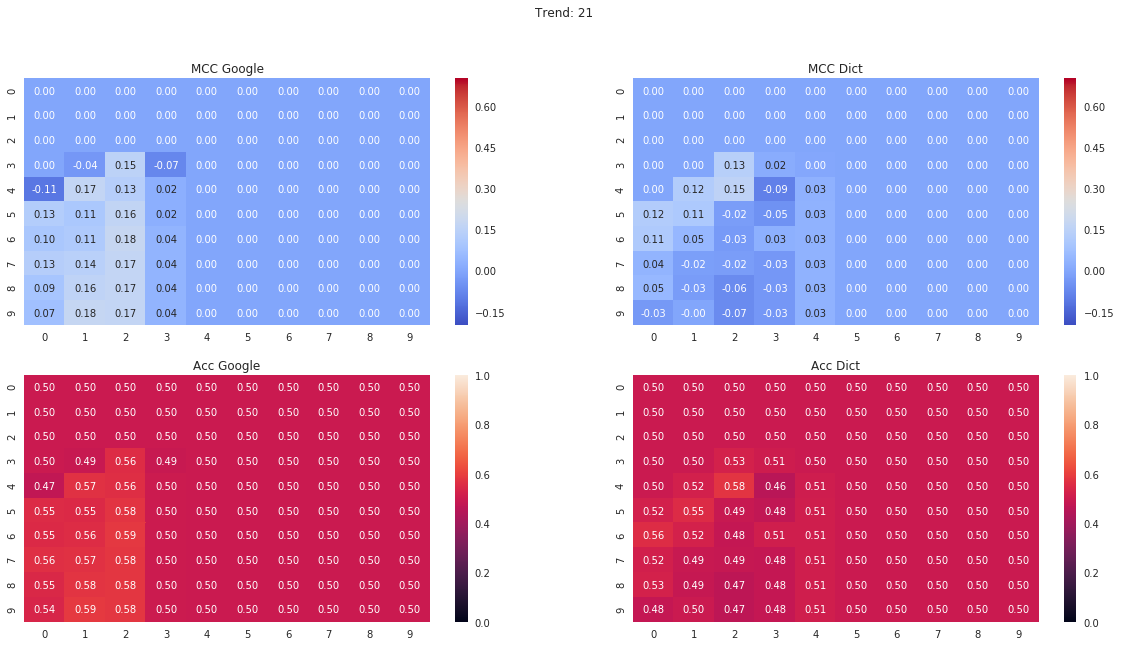

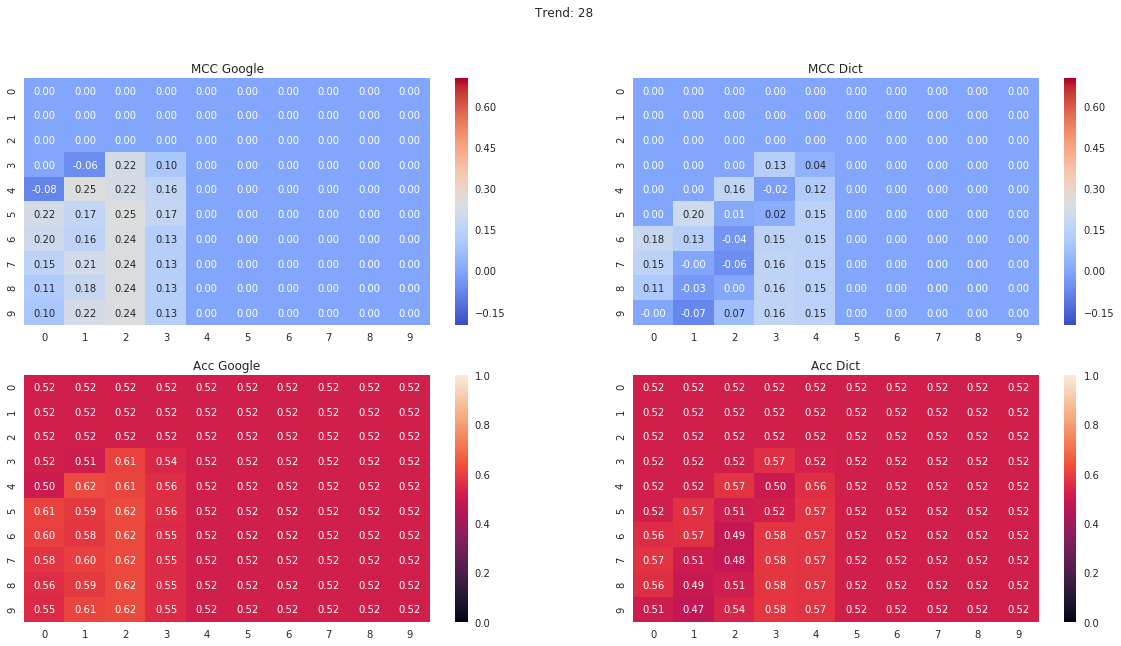

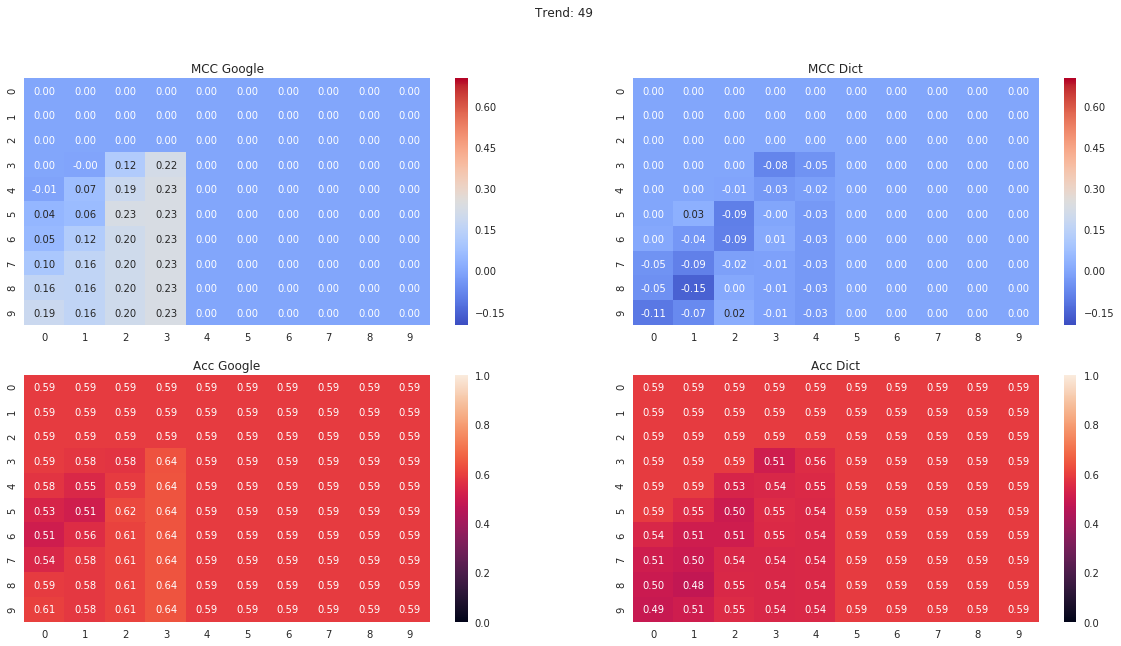

In [4]:
# ========== KSVM (training set is balanced for every trend window) =================




#NORMALIZATION:
min_max_scaler = preprocessing.MinMaxScaler()
X_google = np.nan_to_num(np.asarray(X_google, dtype=float))
X_google = np.asarray(min_max_scaler.fit_transform(X_google))

X_dict = np.nan_to_num(np.asarray(X_dict, dtype=float))
X_dict = np.asarray(min_max_scaler.fit_transform(X_dict))

for TREND_WINDOW in TREND_WINDOWs:

    x_google = list()
    x_dict = list()

    #CONSTRUCT LABELS
    y = list()
    up = 0
    down = 0
    for i in range(0,len(price)-TREND_WINDOW):
        s=np.sign(price.iloc[i+TREND_WINDOW]['close']-price.iloc[i]['close'])
        if(s==-1):
            y.append(0)
            down +=1
        else:
            y.append(1)
            up +=1
        x_google.append(X_google[i])
        x_dict.append(X_dict[i])

    #PAST
#     for i in range(TREND_WINDOW,len(price)):
#         s=np.sign(price.iloc[i]['close']-price.iloc[i-TREND_WINDOW]['close'])
#         if(s==-1):
#             y.append(0)
#             down +=1
#         else:
#             y.append(1)
#             up +=1
#         x_google.append(X_google[i])
#         x_dict.append(X_dict[i])

    y = np.array(y)
    x_google = np.array(x_google)
    x_dict = np.array(x_dict)


    accs_google = np.ones([10,10])*-1
    accs_dict = np.ones([10,10])*-1
    MCC_google = np.ones([10,10])*-1
    MCC_dict = np.ones([10,10])*-1
    cSpace = np.logspace(-3,5,10)
    gSpace = np.logspace(-3,5,10)
    for c in range(0,10):
        for g in range(0,10):
            for (x,y,MCCs,accs) in [(x_google,y,MCC_google,accs_google),(x_dict, y,MCC_dict,accs_dict)]:
                #DATASET DIVISION:
                train=0.7
                nt=math.ceil(len(x)*train)
                x_tv = x[:nt]
                y_tv = y[:nt]
                x_test = x[nt:]
                y_test = y[nt:]

                #print('UP: '+str(up)+'\t DOWN: '+str(down))
                #print('UP TRAIN-VAL: '+str(sum(y_tv)/len(y_tv)*100)+'%')
                #print('UP TEST: '+str(sum(y_test)/len(y_test)*100)+'%')

                svm_model = svm.SVC(kernel='rbf', C=cSpace[c], gamma=gSpace[g])
                svm_model.fit(x_tv,y_tv)
                y_pred = svm_model.predict(x_test)
                acc = svm_model.score(x_test,y_test)
                confmatrix = confusion_matrix(y_test, y_pred)
                tn, fp, fn, tp = confmatrix.ravel()
                denom = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)
                accs[c][g] = acc
                MCCs[c][g] = 0 if denom== 0 else (tp*tn -fp*fn)/sqrt(denom)
        #       print('MCC,score',MCC)
        #       print('Acc-score:',acc)
        #       print('Window:',TREND_WINDOW)
        #       print(confmatrix)
        #       plt.plot(y_pred)
        #       plt.plot(y_test)
        #       plt.show()
    fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20,10))
    fig.suptitle('Trend: '+str(TREND_WINDOW))
    ax1.set_title('MCC Google')
    sns_plot = sns.heatmap(MCC_google, ax=ax1, vmin=-0.2, vmax=0.7, annot=True, fmt=".2f",cmap='coolwarm')
    ax2.set_title('MCC Dict')
    sns_plot = sns.heatmap(MCC_dict,ax=ax2, vmin=-0.2, vmax=0.7, annot=True, fmt=".2f",cmap='coolwarm')
    
    ax3.set_title('Acc Google')
    sns_plot = sns.heatmap(accs_google, ax=ax3, vmin=0, vmax=1, annot=True, fmt=".2f")
    ax4.set_title('Acc Dict')
    sns_plot = sns.heatmap(accs_dict,ax=ax4, vmin=0, vmax=1, annot=True, fmt=".2f")
    plt.savefig('future/hourly-comparison/KSVM/Trend_'+str(TREND_WINDOW)+'.jpg')
